<h1><strong><u>K-Means Model Template</u></strong></h1>

In [32]:
%%capture
%run ../DataPreparation.ipynb

<h2><strong><u>K-Means Model Selection</u></strong></h2>

<h3><strong><u>Internal Clustering Metrics</u></strong></h3>

In [14]:
wss_values = []
sil_values = []
dbi_values = []
chi_values = []
dunn_values = []

maximum = 11
wsse_range = range(1,maximum)
sil_range = range(2,maximum)



for k in wsse_range:
    clusters = KMeans(n_clusters=k, random_state=1).fit(X_train_ct)
    labels = clusters.predict(X_train_ct)
    cm = ClusteringMetric(X=X_train_ct, y_pred=labels)
    wss_values.append(clusters.inertia_)
    if k > 1: 
        sil_values.append(silhouette_score(X_train_ct, clusters.labels_))
        dbi_values.append(davies_bouldin_score(X_train_ct, labels))
        chi_values.append(calinski_harabasz_score(X_train_ct, labels))
        dunn_values.append(cm.dunn_index())

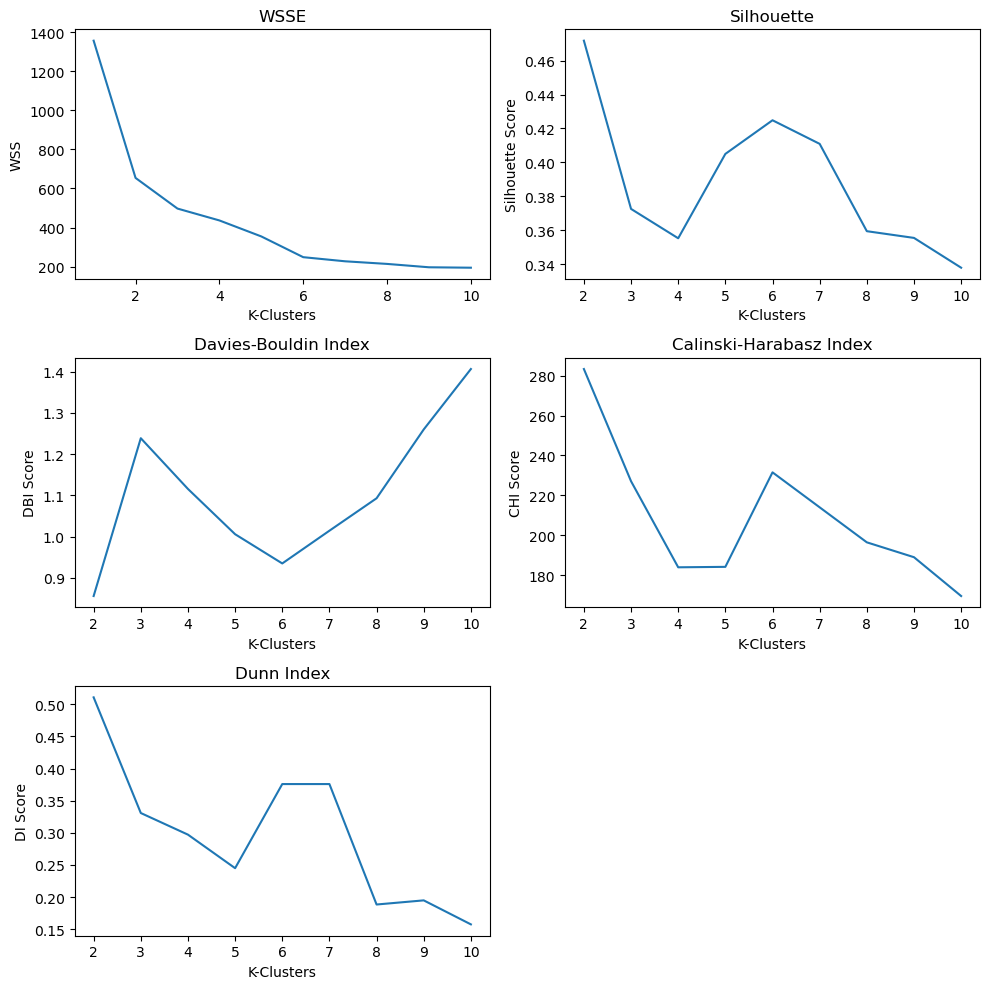

In [15]:
plot_dict = {"WSSE": [[wsse_range, wss_values], ["K-Clusters", "WSS"]],
            "Silhouette": [[sil_range, sil_values], ["K-Clusters", "Silhouette Score"]],
            "Davies-Bouldin Index": [[sil_range, dbi_values], ["K-Clusters", "DBI Score"]],
            "Calinski-Harabasz Index": [[sil_range, chi_values], ["K-Clusters", "CHI Score"]],
            "Dunn Index": [[sil_range, dunn_values], ["K-Clusters", "DI Score"]]}

# Create an even number of subplots (e.g., 3 rows, 2 columns for 5 plots)
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in plot_dict.items():
    axs[count].plot(value[0][0], value[0][1])
    axs[count].set_xlabel(value[1][0])
    axs[count].set_ylabel(value[1][1])
    axs[count].set_title(key)
    count += 1

# Delete the unused subplot (e.g., the last one for a 3x2 grid with 5 plots)
fig.delaxes(axs[5]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Validation Curves</u></strong></h3>

In [ ]:
vc_dict = {}
clstr_metrics = {'adjusted_rand_score': ["Adjusted Rand Index", "ARI"],
                      'adjusted_mutual_info_score': ["Adjusted Mutual Information", "AMI"],
                      'homogeneity_score': ["Homogeneity Score", "Homogeneity"],
                      'completeness_score': ["Completeness Score", "Completeness"],
                      'v_measure_score': ["V-Measure Score", "V-Measure"]}

for key, value in clstr_metrics.items():
    pipeline = Pipeline(
        [
            ("ct", ct),
            ("kmeans", KMeans(random_state=1))
        ]
    )
    clusters = list(range(1,30))

    train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring=key,
                                                    param_name="kmeans__n_clusters",
                                                    param_range=clusters,
                                                    n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    vc_dict[f"KMeans Clusters: {value[0]}"] = [[clusters, train_scores_mean], [clusters, validation_scores_mean], ["K-Clusters", value[1]]]

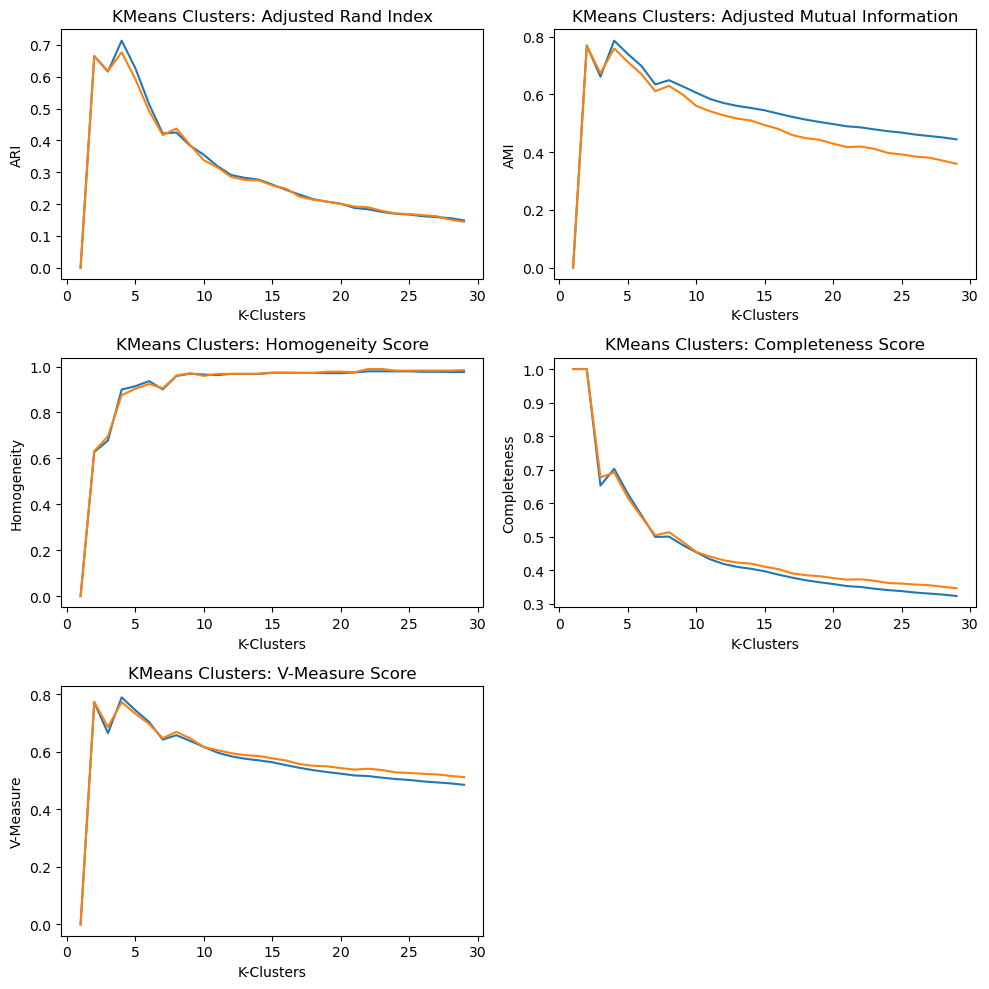

In [29]:
# Create an even number of subplots (e.g., 3 rows, 2 columns for 5 plots)
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in vc_dict.items():
    axs[count].plot(value[0][0], value[0][1])
    axs[count].plot(value[1][0], value[1][1])
    axs[count].set_xlabel(value[2][0])
    axs[count].set_ylabel(value[2][1])
    axs[count].set_title(key)
    count += 1

# Delete the unused subplot (e.g., the last one for a 3x2 grid with 5 plots)
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [35]:
pipeline = Pipeline(
    [
        ("ct", ct),
        ("kmeans", KMeans(random_state=1)),
    ]
)

cv_params = {
    'kmeans__n_clusters': list(range(1,6)) #find a range
}
grid_search = GridSearchCV(pipeline, cv_params, cv=5, n_jobs=-1, scoring='adjusted_rand_score')
grid_search.fit(X_train, y_train)
kmeans_classifier = grid_search.best_estimator_
print(grid_search.best_params_)

def kmeans_clickbait_classifier():
    return kmeans_classifier


{'kmeans__n_clusters': 4}


In [ ]:
# clusters_train = KMeans(n_clusters=3).fit(X_train_scaled_pca)
# train_conf_matrix = pair_confusion_matrix(y_train, clusters_train.labels_)
# display(train_conf_matrix)

array([[42710,  3032],
       [ 3968, 20780]])

In [ ]:
# clusters_test = KMeans(n_clusters=3).fit(X_test_scaled_pca)
# test_conf_matrix = pair_confusion_matrix(y_test, clusters_test.labels_)
# display(test_conf_matrix)

array([[2024,  806],
       [ 260, 1332]])

In [ ]:
display("Pairwise training accuracy: ", (train_conf_matrix[0][0]+train_conf_matrix[1][1]) / (train_conf_matrix[0][0]+train_conf_matrix[0][1] + train_conf_matrix[1][0] + train_conf_matrix[1][1]))
# display("Pairwise testing accuracy: ", (test_conf_matrix[0][0]+test_conf_matrix[1][1]) / (test_conf_matrix[0][0]+test_conf_matrix[0][1] + test_conf_matrix[1][0] + test_conf_matrix[1][1]))

'Pairwise training accuracy: '

np.float64(0.8747056320045397)

'Pairwise testing accuracy: '

np.float64(0.7589326096788783)